In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def parse_file(file, metric):
    values = []
    with open(file, "r") as f:
        for line in f:
            if "DEBUG:attn:[Epoch" in line:
                res = " ".join(line.split(" ")[2:])
                res = res.replace(":", "").replace(",", "").replace("\n", "").split(" ")
                i = res.index(metric)
                val = float(res[i+1])
                values.append(val)
    return values

In [3]:
file = "candle_baseline_stderr.txt"
metric = "val_tf_auc"
data = parse_file(file, metric)

In [7]:
files = {
#     "Baseline": "candle_baseline_stderr.txt",
    "ADBO": "candle_best_DBO_stderr.txt",
    "HB": "candle_best_HB_stderr.txt"
}

In [8]:
metric = "val_tf_auc"
# metric = "val_acc"
# metric = "val_loss"
data = {k:parse_file(file, metric) for k, file in files.items()}

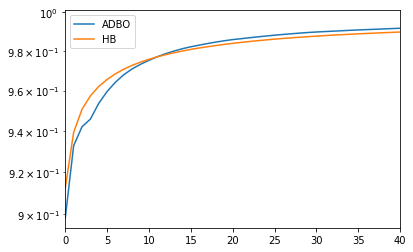

In [9]:
plt.figure()
for k, metric in data.items():
    x = list(range(len(metric)))
    plt.plot(x, metric, label=k)
plt.legend()
# plt.ylim(0.92)
plt.xlim(0, 40)
plt.yscale("log")
plt.show()